In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [368]:
pd.set_option('display.max_row', 500)

pd.set_option('display.max_columns', 100)

In [369]:
train = pd.read_csv('C:\\Users\\박인창\\OneDrive - 한양대학교\\DACON\\신용카드\\train.csv')
test = pd.read_csv('C:\\Users\\박인창\\OneDrive - 한양대학교\\DACON\\신용카드\\test.csv')

In [370]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


### 결측값 처리

In [371]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [372]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [373]:
train['occyp_type'] = train['occyp_type'].fillna('NAN')

In [374]:
test['occyp_type'] = test['occyp_type'].fillna('NAN')

In [375]:
train.isnull().sum().sum()

0

## 원핫 인코딩

In [376]:
col = ['income_type', 'edu_type', 'family_type', 'house_type','occyp_type']

In [377]:
df = train.copy()

In [378]:
for i in col:
    a = pd.get_dummies(df[i])
    df = pd.concat([df,a],axis=1)

In [379]:
for i in col:
    a = pd.get_dummies(test[i])
    test = pd.concat([test,a],axis=1)

In [380]:
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,Commercial associate,Pensioner,State servant,Student,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,NAN,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NAN,2.0,-6.0,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [381]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,Commercial associate,Pensioner,State servant,Student,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,NAN,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NAN,2.0,-60.0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### 변환한 변수 제거

In [382]:
df.drop(col,axis=1,inplace=True)

In [383]:
test.drop(col,axis=1,inplace=True)

In [384]:
df

,index,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,Commercial associate,Pensioner,State servant,Student,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,NAN,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0,F,N,N,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,F,N,Y,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0,1.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,M,Y,Y,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0,2.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,F,N,Y,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0,0.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,F,Y,Y,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0,2.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,-12079,-1984,1,0,0,0,4.0,-2.0,1.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26453,26453,F,N,Y,1,180000.0,-15291,-2475,1,0,0,0,2.0,-47.0,2.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
26454,26454,F,Y,N,0,292500.0,-10082,-2015,1,0,0,0,2.0,-25.0,2.0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26455,26455,M,N,Y,0,171000.0,-10145,-107,1,0,0,0,1.0,-59.0,2.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## 레이블 인코딩

In [385]:
def gender(df):
    if df == 'F':
        return 0
    else:
        return 1

def car(df):
    if df == 'Y':
        return 1
    else:
        return 0

In [386]:
df['gender'] = df['gender'].apply(gender)
df['car'] = df['car'].apply(car)
df['reality'] = df['reality'].apply(car)

In [387]:
test['gender'] = test['gender'].apply(gender)
test['car'] = test['car'].apply(car)
test['reality'] = test['reality'].apply(car)

In [388]:
df

,index,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,Commercial associate,Pensioner,State servant,Student,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,NAN,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0,0,0,0,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0,1.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0,2.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,0,0,1,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0,0.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,0,1,1,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0,2.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,-12079,-1984,1,0,0,0,4.0,-2.0,1.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26453,26453,0,0,1,1,180000.0,-15291,-2475,1,0,0,0,2.0,-47.0,2.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
26454,26454,0,1,0,0,292500.0,-10082,-2015,1,0,0,0,2.0,-25.0,2.0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26455,26455,1,0,1,0,171000.0,-10145,-107,1,0,0,0,1.0,-59.0,2.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [389]:
df.drop('index',axis=1,inplace=True)

In [390]:
test.drop('index',axis=1,inplace=True)

#### 1차 전처리 데이터

In [391]:
print(df.shape)
df.head()

(26457, 54)


,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,Commercial associate,Pensioner,State servant,Student,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,NAN,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0,0,0,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0,1.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0,2.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0,0.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0,2.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### 

In [392]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'] / -365
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'] / -365
df['begin_month'] = df['begin_month'] * -1

In [393]:
test['DAYS_BIRTH'] = test['DAYS_BIRTH'] / -365
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'] / -365
test['begin_month'] = test['begin_month'] * -1

## 데이터 확인

### 기초통계량 확인

In [394]:
df.describe()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,Commercial associate,Pensioner,State servant,Student,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,NAN,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
count,26457.000000,26457.000000,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.331103,0.379748,0.673924,0.428658,1.873065e+05,43.720696,-161.832194,1.0,0.224742,0.294251,0.091280,2.196848,26.123294,1.519560,0.234418,0.168160,0.081415,0.000265,0.515743,0.000869,0.270703,0.038553,0.009714,0.680160,0.080243,0.687757,0.058170,0.132139,0.041690,0.004158,0.894017,0.030918,0.007181,0.016215,0.047511,0.034093,0.015232,0.017273,0.100011,0.059531,0.002343,0.039309,0.001550,0.170541,0.004800,0.081906,0.032657,0.308841,0.009185,0.002381,0.095967,0.003666,0.016026,0.004687
std,0.470619,0.485333,0.468784,0.747326,1.018784e+05,11.511203,376.645007,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283,0.423643,0.374015,0.273477,0.016264,0.499762,0.029472,0.444332,0.192531,0.098081,0.466423,0.271675,0.463417,0.234069,0.338648,0.199884,0.064347,0.307822,0.173099,0.084440,0.126304,0.212733,0.181472,0.122478,0.130290,0.300021,0.236620,0.048353,0.194333,0.039336,0.376114,0.069119,0.274227,0.177740,0.462024,0.095398,0.048741,0.294552,0.060440,0.125578,0.068301
min,0.000000,0.000000,0.000000,0.000000,2.700000e+04,21.109589,-1000.665753,1.0,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.215000e+05,34.098630,1.115068,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.575000e+05,42.594521,4.216438,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,2.250000e+05,53.235616,8.638356,1.0,0.000000,1.000000,0.000000,3.000000,39.000000,2.0000

### 분포 및 이상치 확인
- 연속형 변수 대상으로

In [395]:
check_list = ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size','begin_month']

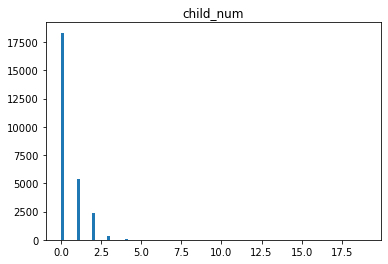

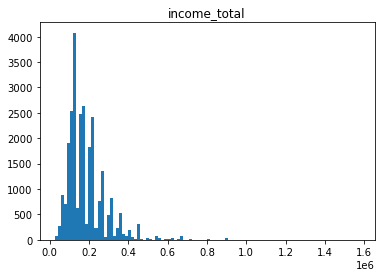

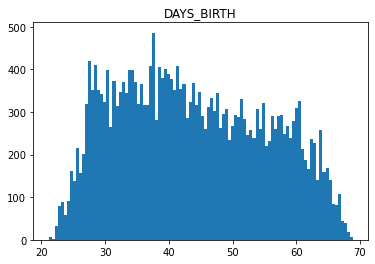

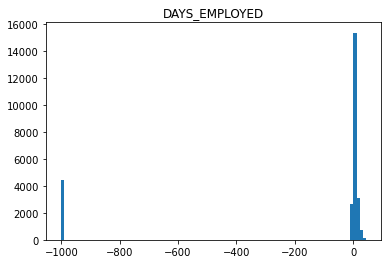

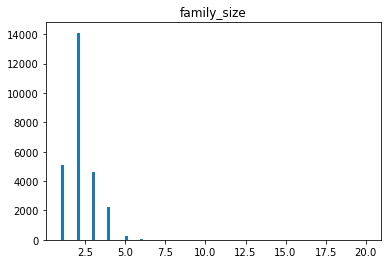

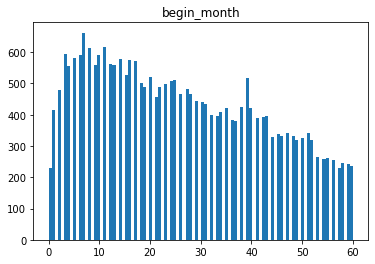

In [396]:
for i in check_list:
    plt.title(i)
    plt.hist(df[i],bins=100)
    plt.show()

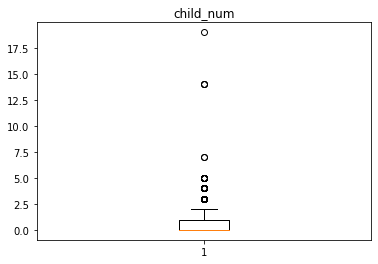

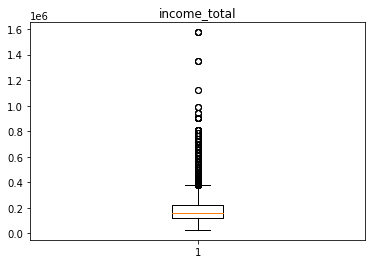

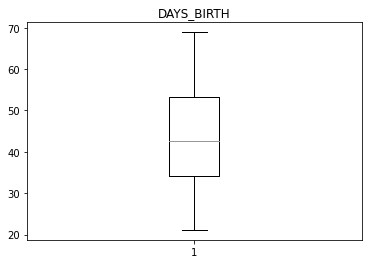

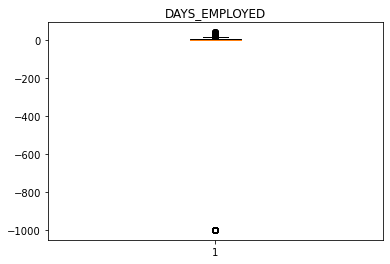

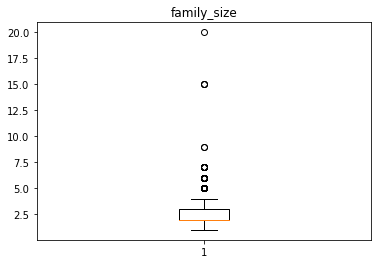

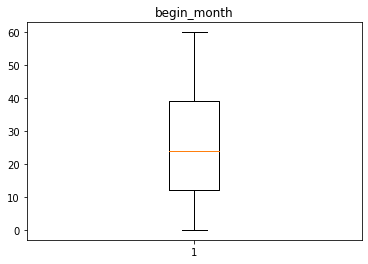

In [397]:
for i in check_list:
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

#### 불균형 데이터
- Child_num, income_total, DAYS_EMPLOYED, family_size 네 개의 변수가 불균형 데이터임
- 모두 오른쪽 꼬리 형태를 취하고 있으므로 해당 처리 필요 --> 우선 로그변환 적용 후 확인

#### 이상치 데이터
- Child_num, income_total, DAYS_EMPLOYED, family_size  모두 이상치 데이터 존재
- 그 중 Days EPLOYED 변수가 가장 심함
- 분포 변환 후 다시 확인

## 변수 issue

#### 1) "FLAG_MOBIL' 변수 모두 1이므로 삭제

In [398]:
print(df['FLAG_MOBIL'].value_counts())
df.drop('FLAG_MOBIL',axis=1,inplace=True)

1    26457
Name: FLAG_MOBIL, dtype: int64


In [399]:
test.drop('FLAG_MOBIL',axis=1,inplace=True)

#### 2) DAYS_EMPLOYED 값의 분포 이슈

In [400]:
print(df['DAYS_EMPLOYED'].value_counts())

-1000.665753    4438
 1.098630         57
 4.216438         47
 0.547945         45
 5.717808         44
                ... 
 17.942466         1
 9.509589          1
 4.389041          1
 3.950685          1
 1.008219          1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64


##### 특정숫자의 값이 이상하게 많고 기존 다른값과 차이가 심함
- 이상치 0으로 대체

In [401]:
df.loc[(df.DAYS_EMPLOYED)<=0,'DAYS_EMPLOYED'] = 0

In [402]:
print(df['DAYS_EMPLOYED'].value_counts())

0.000000     4438
1.098630       57
4.216438       47
0.547945       45
5.717808       44
             ... 
4.438356        1
6.284932        1
26.049315       1
0.471233        1
11.361644       1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64


### 3) 자식 수 최대값 이상치

In [403]:
df['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

- 비정상적으로 많은 자식 수 존재
- 다른 참가자 전처리 방식 참고하여 2 이상을 2로 대체

In [404]:
df.loc[df['child_num'] >= 2,'child_num']=2

In [405]:
df['child_num'].value_counts()

0    18340
1     5386
2     2731
Name: child_num, dtype: int64

### 4) 로그 변환

In [406]:
dist_check_list = ['income_total', 'DAYS_EMPLOYED','family_size']

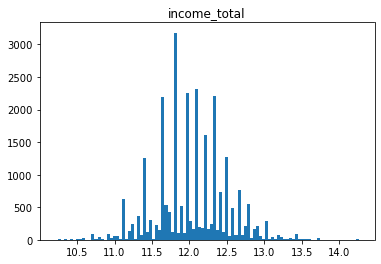

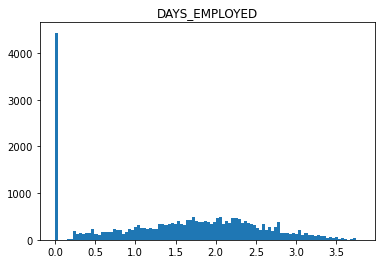

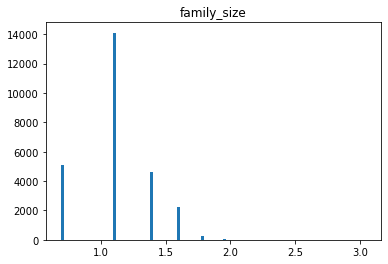

In [407]:
for i in dist_check_list:
    np.log1p(df[i])
    plt.title(i)
    plt.hist(np.log1p(df[i]),bins=100)
    plt.show()

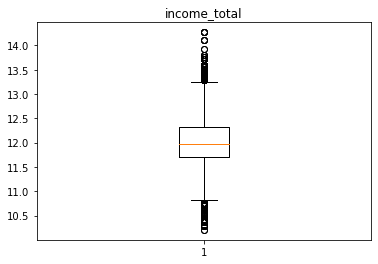

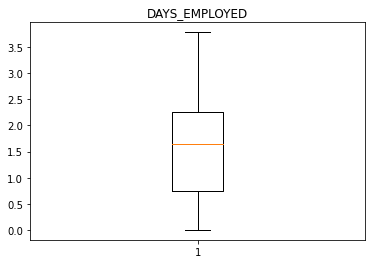

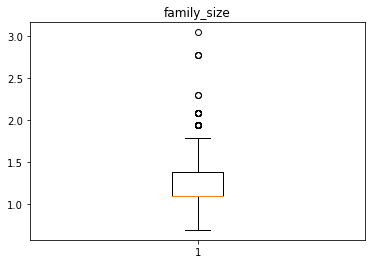

In [408]:
for i in dist_check_list:
    np.log1p(df[i])
    plt.title(i)
    plt.boxplot(np.log1p(df[i]))
    plt.show()

income 변수의 경우는 정규 분포로 변환 가능하였지만 Day_employed 변수와 family_size 변수는 큰 차이를 보이지 않음

#### 일단 해당 변수들에 대해 로그변환한 변수 올려놓음

In [409]:
log_list = ['income_total', 'DAYS_EMPLOYED','family_size']

In [410]:
for i in log_list:
    df['ln_%s'%i] = np.log1p(df[i])

In [411]:
for i in log_list:
    test['ln_%s'%i] = np.log1p(test[i])

In [412]:
df

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,Commercial associate,Pensioner,State servant,Student,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,NAN,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,ln_income_total,ln_DAYS_EMPLOYED,ln_family_size
0,0,0,0,0,202500.0,38.079452,12.901370,0,0,0,2.0,6.0,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12.218500,2.631987,1.098612
1,0,0,1,1,247500.0,31.178082,4.219178,0,0,1,3.0,5.0,1.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12.419170,1.652340,1.386294
2,1,1,1,0,450000.0,52.293151,12.147945,0,1,0,2.0,22.0,2.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,13.017005,2.576265,1.098612
3,0,0,1,0,202500.0,41.336986,5.731507,0,1,0,2.0,37.0,0.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,12.218500,1.906799,1.098612
4,0,1,1,0,157500.0,41.197260,5.767123,0,0,0,2.0,26.0,2.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,11.967187,1.912076,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,33.093151,5.435616,0,0,0,4.0,2.0,1.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.323860,1.861848,1.609438
26453,0,0,1,1,180000.0,41.893151,6.780822,0,0,0,2.0,47.0,2.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12.100718,2.051662,1.098612
26454,0,1,0,0,292500.0,27.621918,5.520548,0,0,0,2.0,25.0,2.0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.586223,1.874958,1.098612
26455,1,0,1,0,171000.0,27.794521,0.293151,0,0,0,1.0,59.0,2.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12.049425,0.257082,0.693147


In [413]:
test

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,Commercial associate,Pensioner,State servant,Student,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,NAN,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,ln_income_total,ln_DAYS_EMPLOYED,ln_family_size
0,1,1,0,0,112500.0,60.246575,-1000.665753,0,1,0,2.0,60.0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11.630717,NaN,1.098612
1,0,0,1,0,135000.0,51.956164,23.756164,0,1,0,2.0,36.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.813037,3.209075,1.098612
2,0,0,1,0,69372.0,43.526027,0.594521,1,1,0,2.0,40.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11.147253,0.466573,1.098612
3,1,1,0,0,112500.0,52.794521,6.934247,1,0,0,2.0,41.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.630717,2.071188,1.098612
4,0,1,1,0,225000.0,48.827397,25.712329,1,0,0,2.0,8.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,12.323860,3.285125,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,202500.0,50.939726,14.887671,1,1,0,2.0,19.0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.218500,2.765543,1.098612
9996,1,1,1,0,202500.0,29.824658,3.602740,1,0,0,2.0,34.0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12.218500,1.526652,1.098612
9997,0,0,1,0,292500.0,57.578082,38.405479,0,0,0,2.0,55.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,12.586223,3.673905,1.098612
9998,0,1,0,0,180000.0,45.317808,2.972603,0,1,0,2.0,33.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12.100718,1.379421,1.098612


# 예측

In [414]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [415]:
import matplotlib.pyplot as plt
%matplotlib inline

In [416]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [417]:
X = df.drop('credit',axis=1)
y = df['credit']

In [418]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [419]:
X_train = X_train.reset_index().drop(['index'],axis=1)

In [420]:
y_train = y_train.reset_index().drop(['index'],axis=1)

In [421]:
X_train.shape

(21165, 55)

In [422]:
y_train

,credit
0,2.0
1,2.0
2,0.0
3,2.0
4,1.0
...,...
21160,2.0
21161,2.0
21162,0.0
21163,2.0


#### 불용 변수 필터

In [423]:
X_train.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'Commercial associate', 'Pensioner', 'State servant',
       'Student', 'Working', 'Academic degree', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Secondary / secondary special',
       'Civil marriage', 'Married', 'Separated', 'Single / not married',
       'Widow', 'Co-op apartment', 'House / apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents', 'Accountants',
       'Cleaning staff', 'Cooking staff', 'Core staff', 'Drivers', 'HR staff',
       'High skill tech staff', 'IT staff', 'Laborers', 'Low-skill Laborers',
       'Managers', 'Medicine staff', 'NAN', 'Private service staff',
       'Realty agents', 'Sales staff', 'Secretaries', 'Security staff',
       'Waiters/barmen staff', 'ln_income_total', 'ln_DAYS_EMPLOYED',
       'ln_family_size'],
   

In [424]:
av_col = ['gender', 'car', 'reality', 'child_num', 'DAYS_BIRTH', 'work_phone', 'phone', 'email',
       'begin_month', 'Commercial associate', 'Pensioner', 'State servant',
       'Student', 'Working', 'Academic degree', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Secondary / secondary special',
       'Civil marriage', 'Married', 'Separated', 'Single / not married',
       'Widow', 'Co-op apartment', 'House / apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents', 'Accountants',
       'Cleaning staff', 'Cooking staff', 'Core staff', 'Drivers', 'HR staff',
       'High skill tech staff', 'IT staff', 'Laborers', 'Low-skill Laborers',
       'Managers', 'Medicine staff', 'NAN', 'Private service staff',
       'Realty agents', 'Sales staff', 'Secretaries', 'Security staff',
       'Waiters/barmen staff', 'ln_income_total', 'ln_DAYS_EMPLOYED',
       'ln_family_size']

In [425]:
X_train = X_train[av_col]
X_test = X_test[av_col]

In [426]:
test = X_test[av_col]

### 클래스 불균형(optional)

In [427]:
y_train['credit'].value_counts()

2.0    13558
1.0     5029
0.0     2578
Name: credit, dtype: int64

- 클래스의 불균형이 심하기 때문에 처리가 필요
- XGBoost에서는 SMOTE / DNN에서는 클래스 가중치 부여로 시도

In [428]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [429]:
y_train_over['credit'].value_counts()

1.0    13558
0.0    13558
2.0    13558
Name: credit, dtype: int64

# XGB

### 오버 샘플링 X

In [269]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [270]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=5000, learning_rate=0.01, max_depth=10)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="mlogloss", 
                eval_set=evals, verbose=True)

[0]	validation_0-mlogloss:1.09394
[1]	validation_0-mlogloss:1.08934
[2]	validation_0-mlogloss:1.08482
[3]	validation_0-mlogloss:1.08039
[4]	validation_0-mlogloss:1.07603
[5]	validation_0-mlogloss:1.07173
[6]	validation_0-mlogloss:1.06750
[7]	validation_0-mlogloss:1.06335
[8]	validation_0-mlogloss:1.05925
[9]	validation_0-mlogloss:1.05523
[10]	validation_0-mlogloss:1.05127
[11]	validation_0-mlogloss:1.04738
[12]	validation_0-mlogloss:1.04356
[13]	validation_0-mlogloss:1.03979
[14]	validation_0-mlogloss:1.03608
[15]	validation_0-mlogloss:1.03243
[16]	validation_0-mlogloss:1.02885
[17]	validation_0-mlogloss:1.02532
[18]	validation_0-mlogloss:1.02181
[19]	validation_0-mlogloss:1.01839
[20]	validation_0-mlogloss:1.01503
[21]	validation_0-mlogloss:1.01169
[22]	validation_0-mlogloss:1.00843
[23]	validation_0-mlogloss:1.00521
[24]	validation_0-mlogloss:1.00204
[25]	validation_0-mlogloss:0.99891
[26]	validation_0-mlogloss:0.99587
[27]	validation_0-mlogloss:0.99280
[28]	validation_0-mlogloss:0.9

[231]	validation_0-mlogloss:0.78535
[232]	validation_0-mlogloss:0.78515
[233]	validation_0-mlogloss:0.78494
[234]	validation_0-mlogloss:0.78473
[235]	validation_0-mlogloss:0.78453
[236]	validation_0-mlogloss:0.78433
[237]	validation_0-mlogloss:0.78411
[238]	validation_0-mlogloss:0.78391
[239]	validation_0-mlogloss:0.78371
[240]	validation_0-mlogloss:0.78349
[241]	validation_0-mlogloss:0.78328
[242]	validation_0-mlogloss:0.78311
[243]	validation_0-mlogloss:0.78291
[244]	validation_0-mlogloss:0.78273
[245]	validation_0-mlogloss:0.78256
[246]	validation_0-mlogloss:0.78238
[247]	validation_0-mlogloss:0.78219
[248]	validation_0-mlogloss:0.78201
[249]	validation_0-mlogloss:0.78183
[250]	validation_0-mlogloss:0.78164
[251]	validation_0-mlogloss:0.78145
[252]	validation_0-mlogloss:0.78130
[253]	validation_0-mlogloss:0.78114
[254]	validation_0-mlogloss:0.78096
[255]	validation_0-mlogloss:0.78082
[256]	validation_0-mlogloss:0.78067
[257]	validation_0-mlogloss:0.78049
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.75907
[460]	validation_0-mlogloss:0.75904
[461]	validation_0-mlogloss:0.75902
[462]	validation_0-mlogloss:0.75896
[463]	validation_0-mlogloss:0.75890
[464]	validation_0-mlogloss:0.75887
[465]	validation_0-mlogloss:0.75887
[466]	validation_0-mlogloss:0.75881
[467]	validation_0-mlogloss:0.75876
[468]	validation_0-mlogloss:0.75870
[469]	validation_0-mlogloss:0.75869
[470]	validation_0-mlogloss:0.75860
[471]	validation_0-mlogloss:0.75855
[472]	validation_0-mlogloss:0.75847
[473]	validation_0-mlogloss:0.75844
[474]	validation_0-mlogloss:0.75837
[475]	validation_0-mlogloss:0.75833
[476]	validation_0-mlogloss:0.75831
[477]	validation_0-mlogloss:0.75824
[478]	validation_0-mlogloss:0.75819
[479]	validation_0-mlogloss:0.75811
[480]	validation_0-mlogloss:0.75806
[481]	validation_0-mlogloss:0.75803
[482]	validation_0-mlogloss:0.75798
[483]	validation_0-mlogloss:0.75796
[484]	validation_0-mlogloss:0.75787
[485]	validation_0-mlogloss:0.75787
[486]	validation_0-mlogloss:

[687]	validation_0-mlogloss:0.74865
[688]	validation_0-mlogloss:0.74859
[689]	validation_0-mlogloss:0.74857
[690]	validation_0-mlogloss:0.74853
[691]	validation_0-mlogloss:0.74852
[692]	validation_0-mlogloss:0.74847
[693]	validation_0-mlogloss:0.74846
[694]	validation_0-mlogloss:0.74843
[695]	validation_0-mlogloss:0.74838
[696]	validation_0-mlogloss:0.74837
[697]	validation_0-mlogloss:0.74832
[698]	validation_0-mlogloss:0.74830
[699]	validation_0-mlogloss:0.74826
[700]	validation_0-mlogloss:0.74823
[701]	validation_0-mlogloss:0.74822
[702]	validation_0-mlogloss:0.74817
[703]	validation_0-mlogloss:0.74813
[704]	validation_0-mlogloss:0.74812
[705]	validation_0-mlogloss:0.74812
[706]	validation_0-mlogloss:0.74812
[707]	validation_0-mlogloss:0.74808
[708]	validation_0-mlogloss:0.74805
[709]	validation_0-mlogloss:0.74801
[710]	validation_0-mlogloss:0.74797
[711]	validation_0-mlogloss:0.74796
[712]	validation_0-mlogloss:0.74796
[713]	validation_0-mlogloss:0.74793
[714]	validation_0-mlogloss:

[915]	validation_0-mlogloss:0.74190
[916]	validation_0-mlogloss:0.74188
[917]	validation_0-mlogloss:0.74184
[918]	validation_0-mlogloss:0.74179
[919]	validation_0-mlogloss:0.74177
[920]	validation_0-mlogloss:0.74173
[921]	validation_0-mlogloss:0.74167
[922]	validation_0-mlogloss:0.74164
[923]	validation_0-mlogloss:0.74162
[924]	validation_0-mlogloss:0.74159
[925]	validation_0-mlogloss:0.74157
[926]	validation_0-mlogloss:0.74155
[927]	validation_0-mlogloss:0.74150
[928]	validation_0-mlogloss:0.74148
[929]	validation_0-mlogloss:0.74143
[930]	validation_0-mlogloss:0.74140
[931]	validation_0-mlogloss:0.74133
[932]	validation_0-mlogloss:0.74129
[933]	validation_0-mlogloss:0.74123
[934]	validation_0-mlogloss:0.74118
[935]	validation_0-mlogloss:0.74115
[936]	validation_0-mlogloss:0.74108
[937]	validation_0-mlogloss:0.74108
[938]	validation_0-mlogloss:0.74103
[939]	validation_0-mlogloss:0.74100
[940]	validation_0-mlogloss:0.74096
[941]	validation_0-mlogloss:0.74094
[942]	validation_0-mlogloss:

[1139]	validation_0-mlogloss:0.73655
[1140]	validation_0-mlogloss:0.73654
[1141]	validation_0-mlogloss:0.73653
[1142]	validation_0-mlogloss:0.73650
[1143]	validation_0-mlogloss:0.73648
[1144]	validation_0-mlogloss:0.73646
[1145]	validation_0-mlogloss:0.73643
[1146]	validation_0-mlogloss:0.73643
[1147]	validation_0-mlogloss:0.73643
[1148]	validation_0-mlogloss:0.73642
[1149]	validation_0-mlogloss:0.73640
[1150]	validation_0-mlogloss:0.73639
[1151]	validation_0-mlogloss:0.73639
[1152]	validation_0-mlogloss:0.73638
[1153]	validation_0-mlogloss:0.73638
[1154]	validation_0-mlogloss:0.73636
[1155]	validation_0-mlogloss:0.73633
[1156]	validation_0-mlogloss:0.73634
[1157]	validation_0-mlogloss:0.73633
[1158]	validation_0-mlogloss:0.73631
[1159]	validation_0-mlogloss:0.73630
[1160]	validation_0-mlogloss:0.73628
[1161]	validation_0-mlogloss:0.73626
[1162]	validation_0-mlogloss:0.73624
[1163]	validation_0-mlogloss:0.73621
[1164]	validation_0-mlogloss:0.73623
[1165]	validation_0-mlogloss:0.73623
[

[1361]	validation_0-mlogloss:0.73377
[1362]	validation_0-mlogloss:0.73375
[1363]	validation_0-mlogloss:0.73375
[1364]	validation_0-mlogloss:0.73374
[1365]	validation_0-mlogloss:0.73373
[1366]	validation_0-mlogloss:0.73372
[1367]	validation_0-mlogloss:0.73370
[1368]	validation_0-mlogloss:0.73369
[1369]	validation_0-mlogloss:0.73367
[1370]	validation_0-mlogloss:0.73366
[1371]	validation_0-mlogloss:0.73364
[1372]	validation_0-mlogloss:0.73363
[1373]	validation_0-mlogloss:0.73364
[1374]	validation_0-mlogloss:0.73365
[1375]	validation_0-mlogloss:0.73362
[1376]	validation_0-mlogloss:0.73362
[1377]	validation_0-mlogloss:0.73360
[1378]	validation_0-mlogloss:0.73359
[1379]	validation_0-mlogloss:0.73359
[1380]	validation_0-mlogloss:0.73357
[1381]	validation_0-mlogloss:0.73356
[1382]	validation_0-mlogloss:0.73355
[1383]	validation_0-mlogloss:0.73355
[1384]	validation_0-mlogloss:0.73353
[1385]	validation_0-mlogloss:0.73351
[1386]	validation_0-mlogloss:0.73351
[1387]	validation_0-mlogloss:0.73352
[

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

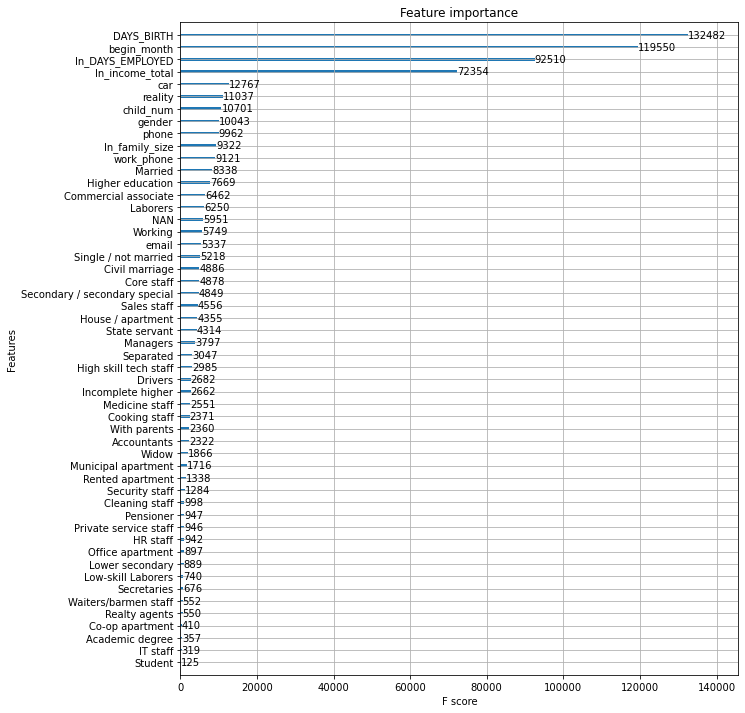

In [274]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

### 오버샘플링 데이터 사용

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=5000, learning_rate=0.01, max_depth=10)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="mlogloss", 
                eval_set=evals, verbose=True)

In [276]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=5000, learning_rate=0.01, max_depth=10)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train_over, y_train_over, early_stopping_rounds=100, eval_metric="mlogloss", 
                eval_set=evals, verbose=True)

[0]	validation_0-mlogloss:1.09571
[1]	validation_0-mlogloss:1.09283
[2]	validation_0-mlogloss:1.09000
[3]	validation_0-mlogloss:1.08721
[4]	validation_0-mlogloss:1.08446
[5]	validation_0-mlogloss:1.08174
[6]	validation_0-mlogloss:1.07902
[7]	validation_0-mlogloss:1.07635
[8]	validation_0-mlogloss:1.07374
[9]	validation_0-mlogloss:1.07115
[10]	validation_0-mlogloss:1.06861
[11]	validation_0-mlogloss:1.06609
[12]	validation_0-mlogloss:1.06359
[13]	validation_0-mlogloss:1.06108
[14]	validation_0-mlogloss:1.05864
[15]	validation_0-mlogloss:1.05626
[16]	validation_0-mlogloss:1.05389
[17]	validation_0-mlogloss:1.05150
[18]	validation_0-mlogloss:1.04920
[19]	validation_0-mlogloss:1.04689
[20]	validation_0-mlogloss:1.04468
[21]	validation_0-mlogloss:1.04246
[22]	validation_0-mlogloss:1.04028
[23]	validation_0-mlogloss:1.03809
[24]	validation_0-mlogloss:1.03594
[25]	validation_0-mlogloss:1.03383
[26]	validation_0-mlogloss:1.03171
[27]	validation_0-mlogloss:1.02968
[28]	validation_0-mlogloss:1.0

[231]	validation_0-mlogloss:0.83330
[232]	validation_0-mlogloss:0.83292
[233]	validation_0-mlogloss:0.83255
[234]	validation_0-mlogloss:0.83219
[235]	validation_0-mlogloss:0.83175
[236]	validation_0-mlogloss:0.83136
[237]	validation_0-mlogloss:0.83101
[238]	validation_0-mlogloss:0.83061
[239]	validation_0-mlogloss:0.83022
[240]	validation_0-mlogloss:0.82985
[241]	validation_0-mlogloss:0.82946
[242]	validation_0-mlogloss:0.82909
[243]	validation_0-mlogloss:0.82871
[244]	validation_0-mlogloss:0.82836
[245]	validation_0-mlogloss:0.82797
[246]	validation_0-mlogloss:0.82761
[247]	validation_0-mlogloss:0.82730
[248]	validation_0-mlogloss:0.82693
[249]	validation_0-mlogloss:0.82656
[250]	validation_0-mlogloss:0.82621
[251]	validation_0-mlogloss:0.82585
[252]	validation_0-mlogloss:0.82551
[253]	validation_0-mlogloss:0.82512
[254]	validation_0-mlogloss:0.82475
[255]	validation_0-mlogloss:0.82445
[256]	validation_0-mlogloss:0.82422
[257]	validation_0-mlogloss:0.82389
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.78765
[460]	validation_0-mlogloss:0.78753
[461]	validation_0-mlogloss:0.78741
[462]	validation_0-mlogloss:0.78736
[463]	validation_0-mlogloss:0.78725
[464]	validation_0-mlogloss:0.78718
[465]	validation_0-mlogloss:0.78701
[466]	validation_0-mlogloss:0.78688
[467]	validation_0-mlogloss:0.78682
[468]	validation_0-mlogloss:0.78661
[469]	validation_0-mlogloss:0.78651
[470]	validation_0-mlogloss:0.78642
[471]	validation_0-mlogloss:0.78635
[472]	validation_0-mlogloss:0.78625
[473]	validation_0-mlogloss:0.78616
[474]	validation_0-mlogloss:0.78597
[475]	validation_0-mlogloss:0.78586
[476]	validation_0-mlogloss:0.78576
[477]	validation_0-mlogloss:0.78571
[478]	validation_0-mlogloss:0.78553
[479]	validation_0-mlogloss:0.78546
[480]	validation_0-mlogloss:0.78532
[481]	validation_0-mlogloss:0.78521
[482]	validation_0-mlogloss:0.78517
[483]	validation_0-mlogloss:0.78507
[484]	validation_0-mlogloss:0.78501
[485]	validation_0-mlogloss:0.78493
[486]	validation_0-mlogloss:

[687]	validation_0-mlogloss:0.77354
[688]	validation_0-mlogloss:0.77352
[689]	validation_0-mlogloss:0.77349
[690]	validation_0-mlogloss:0.77347
[691]	validation_0-mlogloss:0.77342
[692]	validation_0-mlogloss:0.77339
[693]	validation_0-mlogloss:0.77336
[694]	validation_0-mlogloss:0.77335
[695]	validation_0-mlogloss:0.77334
[696]	validation_0-mlogloss:0.77330
[697]	validation_0-mlogloss:0.77326
[698]	validation_0-mlogloss:0.77316
[699]	validation_0-mlogloss:0.77314
[700]	validation_0-mlogloss:0.77311
[701]	validation_0-mlogloss:0.77309
[702]	validation_0-mlogloss:0.77303
[703]	validation_0-mlogloss:0.77303
[704]	validation_0-mlogloss:0.77302
[705]	validation_0-mlogloss:0.77300
[706]	validation_0-mlogloss:0.77298
[707]	validation_0-mlogloss:0.77294
[708]	validation_0-mlogloss:0.77292
[709]	validation_0-mlogloss:0.77288
[710]	validation_0-mlogloss:0.77285
[711]	validation_0-mlogloss:0.77283
[712]	validation_0-mlogloss:0.77283
[713]	validation_0-mlogloss:0.77284
[714]	validation_0-mlogloss:

[915]	validation_0-mlogloss:0.76991
[916]	validation_0-mlogloss:0.76985
[917]	validation_0-mlogloss:0.76985
[918]	validation_0-mlogloss:0.76985
[919]	validation_0-mlogloss:0.76985
[920]	validation_0-mlogloss:0.76984
[921]	validation_0-mlogloss:0.76980
[922]	validation_0-mlogloss:0.76976
[923]	validation_0-mlogloss:0.76976
[924]	validation_0-mlogloss:0.76976
[925]	validation_0-mlogloss:0.76971
[926]	validation_0-mlogloss:0.76965
[927]	validation_0-mlogloss:0.76965
[928]	validation_0-mlogloss:0.76962
[929]	validation_0-mlogloss:0.76961
[930]	validation_0-mlogloss:0.76961
[931]	validation_0-mlogloss:0.76959
[932]	validation_0-mlogloss:0.76956
[933]	validation_0-mlogloss:0.76956
[934]	validation_0-mlogloss:0.76953
[935]	validation_0-mlogloss:0.76950
[936]	validation_0-mlogloss:0.76950
[937]	validation_0-mlogloss:0.76950
[938]	validation_0-mlogloss:0.76950
[939]	validation_0-mlogloss:0.76946
[940]	validation_0-mlogloss:0.76943
[941]	validation_0-mlogloss:0.76942
[942]	validation_0-mlogloss:

[1139]	validation_0-mlogloss:0.76895
[1140]	validation_0-mlogloss:0.76893
[1141]	validation_0-mlogloss:0.76893
[1142]	validation_0-mlogloss:0.76893
[1143]	validation_0-mlogloss:0.76893
[1144]	validation_0-mlogloss:0.76895
[1145]	validation_0-mlogloss:0.76894
[1146]	validation_0-mlogloss:0.76894
[1147]	validation_0-mlogloss:0.76893
[1148]	validation_0-mlogloss:0.76892
[1149]	validation_0-mlogloss:0.76893
[1150]	validation_0-mlogloss:0.76895
[1151]	validation_0-mlogloss:0.76892
[1152]	validation_0-mlogloss:0.76892
[1153]	validation_0-mlogloss:0.76892
[1154]	validation_0-mlogloss:0.76893
[1155]	validation_0-mlogloss:0.76890
[1156]	validation_0-mlogloss:0.76889
[1157]	validation_0-mlogloss:0.76890
[1158]	validation_0-mlogloss:0.76887
[1159]	validation_0-mlogloss:0.76884
[1160]	validation_0-mlogloss:0.76886
[1161]	validation_0-mlogloss:0.76887
[1162]	validation_0-mlogloss:0.76886
[1163]	validation_0-mlogloss:0.76885
[1164]	validation_0-mlogloss:0.76885
[1165]	validation_0-mlogloss:0.76885
[

[1361]	validation_0-mlogloss:0.76842
[1362]	validation_0-mlogloss:0.76843
[1363]	validation_0-mlogloss:0.76844
[1364]	validation_0-mlogloss:0.76843
[1365]	validation_0-mlogloss:0.76844
[1366]	validation_0-mlogloss:0.76846
[1367]	validation_0-mlogloss:0.76847
[1368]	validation_0-mlogloss:0.76849
[1369]	validation_0-mlogloss:0.76850
[1370]	validation_0-mlogloss:0.76850
[1371]	validation_0-mlogloss:0.76851
[1372]	validation_0-mlogloss:0.76853
[1373]	validation_0-mlogloss:0.76855
[1374]	validation_0-mlogloss:0.76853
[1375]	validation_0-mlogloss:0.76853
[1376]	validation_0-mlogloss:0.76853
[1377]	validation_0-mlogloss:0.76854
[1378]	validation_0-mlogloss:0.76853
[1379]	validation_0-mlogloss:0.76855
[1380]	validation_0-mlogloss:0.76855
[1381]	validation_0-mlogloss:0.76855
[1382]	validation_0-mlogloss:0.76854
[1383]	validation_0-mlogloss:0.76856
[1384]	validation_0-mlogloss:0.76857
[1385]	validation_0-mlogloss:0.76859
[1386]	validation_0-mlogloss:0.76861
[1387]	validation_0-mlogloss:0.76862
[

### 오버 샘플링의 결과가 오히려 더 떨어짐 - but 일반화 가능성 高

## 하이퍼 파라미터 튜닝

In [280]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()
xgb_param_grid = {
    'n_estimators' : [200],
    'learning_rate' : [0.001,0.01,0.05,0.1],
    'max_depth' : [6,10,12,15],
}
xgb_grid = GridSearchCV(xgb,param_grid=xgb_param_grid,scoring='accuracy',verbose=1,cv=5)
xgb_grid.fit(X_train,y_train)
print('최고의 파라미터 : ',xgb_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[16:46:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46

[16:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[16:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:53:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:54:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

최고의 파라미터 :  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


In [281]:
print('최고 평균 정확도 : {0:.4f}'.format(xgb_grid.best_score_))
print('최고의 파라미터 : ',xgb_grid.best_params_)

최고 평균 정확도 : 0.7072
최고의 파라미터 :  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


In [282]:
cv_result_df = pd.DataFrame(xgb_grid.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'],inplace=True)

In [283]:
cv_result_df[['params','mean_test_score','rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
13,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.707205,1
10,"{'learning_rate': 0.05, 'max_depth': 12, 'n_es...",0.705032,2
14,"{'learning_rate': 0.1, 'max_depth': 12, 'n_est...",0.705032,2
9,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.703142,4
11,"{'learning_rate': 0.05, 'max_depth': 15, 'n_es...",0.703047,5
15,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.703000,6
12,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.699031,7
7,"{'learning_rate': 0.01, 'max_depth': 15, 'n_es...",0.698323,8
6,"{'learning_rate': 0.01, 'max_depth': 12, 'n_es...",0.695771,9
8,"{'learning_rate': 0.05, 'max_depth': 6, 'n_est...",0.694401,10


In [300]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=5000, learning_rate=0.1, max_depth=10)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=5, eval_metric="mlogloss", 
                eval_set=evals, verbose=True)

[0]	validation_0-mlogloss:1.05350
[1]	validation_0-mlogloss:1.01563
[2]	validation_0-mlogloss:0.98317
[3]	validation_0-mlogloss:0.95597
[4]	validation_0-mlogloss:0.93259
[5]	validation_0-mlogloss:0.91248
[6]	validation_0-mlogloss:0.89482
[7]	validation_0-mlogloss:0.87893
[8]	validation_0-mlogloss:0.86521
[9]	validation_0-mlogloss:0.85336
[10]	validation_0-mlogloss:0.84342
[11]	validation_0-mlogloss:0.83457
[12]	validation_0-mlogloss:0.82661
[13]	validation_0-mlogloss:0.81982
[14]	validation_0-mlogloss:0.81380
[15]	validation_0-mlogloss:0.80841
[16]	validation_0-mlogloss:0.80387
[17]	validation_0-mlogloss:0.79963
[18]	validation_0-mlogloss:0.79537
[19]	validation_0-mlogloss:0.79182
[20]	validation_0-mlogloss:0.78838
[21]	validation_0-mlogloss:0.78571
[22]	validation_0-mlogloss:0.78329
[23]	validation_0-mlogloss:0.78134
[24]	validation_0-mlogloss:0.77922
[25]	validation_0-mlogloss:0.77779
[26]	validation_0-mlogloss:0.77631
[27]	validation_0-mlogloss:0.77434
[28]	validation_0-mlogloss:0.7

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

아주 약간 나아짐

In [297]:
# 확률값으로 예측
ws100_preds = xgb_wrapper.predict_proba(X_test)
ws100_preds

array([[0.16050863, 0.45563042, 0.38386098],
       [0.40291193, 0.06857097, 0.52851707],
       [0.34155804, 0.12810388, 0.53033805],
       ...,
       [0.29657698, 0.17500189, 0.5284211 ],
       [0.07519715, 0.18091254, 0.74389035],
       [0.13426283, 0.17193563, 0.6938015 ]], dtype=float32)

## 제출용

In [350]:
preds = xgb_wrapper.predict_proba(test)

### 제출시 index값 바꿔줘야함

In [352]:
pd.DataFrame(preds).to_csv('xgb_sub1.csv')

## DNN

In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings           
import random
import tensorflow as tf                          
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout                            
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import log_loss
warnings.filterwarnings('ignore')             
%matplotlib inline

### minmaxscaler(optional)

In [458]:
from sklearn.preprocessing import MinMaxScaler

a = MinMaxScaler()
sc = a.fit_transform(X_train)
X_train_min = pd.DataFrame(sc,columns=X_train.columns)

### 종속변수 원핫 인코딩

In [305]:
y_train_oh = tf.keras.utils.to_categorical(y_train)
print(y_train_oh)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


### 클래스 가중치(optional)

In [140]:
y_train['credit'].value_counts()

2.0    12744
1.0     4689
0.0     2409
Name: credit, dtype: int64

In [74]:
zero,one,two = np.bincount(y_train['credit'])
total = zero+one+two

In [77]:
weight_for_0 = (1 / zero)*(total)/3.0 
weight_for_1 = (1 / one)*(total)/3.0
weight_for_2 = (1 / two)*(total)/3.0

In [78]:
class_weight = {0: weight_for_0, 1: weight_for_1,2: weight_for_2}

In [310]:
y_train_oh

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [459]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=512, activation='relu', input_shape=(52,)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_min, y_train_oh, epochs=100, batch_size=32, validation_split=0.25)

Epoch 1/100
497/497 [==============================] - 2s 2ms/step - loss: 0.9042 - accuracy: 0.6363 - val_loss: 0.8899 - val_accuracy: 0.6389
Epoch 2/100
497/497 [==============================] - 1s 2ms/step - loss: 0.8768 - accuracy: 0.6393 - val_loss: 0.8816 - val_accuracy: 0.6389
Epoch 3/100
497/497 [==============================] - 1s 2ms/step - loss: 0.8605 - accuracy: 0.6523 - val_loss: 0.8798 - val_accuracy: 0.6389
Epoch 4/100
497/497 [==============================] - 1s 2ms/step - loss: 0.8656 - accuracy: 0.6480 - val_loss: 0.8762 - val_accuracy: 0.6391
Epoch 5/100
497/497 [==============================] - 1s 2ms/step - loss: 0.8726 - accuracy: 0.6370 - val_loss: 0.8618 - val_accuracy: 0.6565
Epoch 6/100
497/497 [==============================] - 1s 2ms/step - loss: 0.8549 - accuracy: 0.6499 - val_loss: 0.8603 - val_accuracy: 0.6561
Epoch 7/100
497/497 [==============================] - 1s 2ms/step - loss: 0.8677 - accuracy: 0.6478 - val_loss: 0.8552 - val_accuracy: 0.6572

Epoch 58/100
497/497 [==============================] - 1s 2ms/step - loss: 0.7745 - accuracy: 0.6996 - val_loss: 0.8208 - val_accuracy: 0.6890
Epoch 59/100
497/497 [==============================] - 1s 2ms/step - loss: 0.7650 - accuracy: 0.7050 - val_loss: 0.8180 - val_accuracy: 0.6873
Epoch 60/100
497/497 [==============================] - 1s 2ms/step - loss: 0.7730 - accuracy: 0.6972 - val_loss: 0.8288 - val_accuracy: 0.6852
Epoch 61/100
497/497 [==============================] - 1s 2ms/step - loss: 0.7795 - accuracy: 0.6946 - val_loss: 0.8168 - val_accuracy: 0.6901
Epoch 62/100
497/497 [==============================] - 1s 2ms/step - loss: 0.7609 - accuracy: 0.7055 - val_loss: 0.8300 - val_accuracy: 0.6890
Epoch 63/100
497/497 [==============================] - 1s 2ms/step - loss: 0.7754 - accuracy: 0.6959 - val_loss: 0.8145 - val_accuracy: 0.6893
Epoch 64/100
497/497 [==============================] - 1s 2ms/step - loss: 0.7675 - accuracy: 0.7011 - val_loss: 0.8391 - val_accuracy:

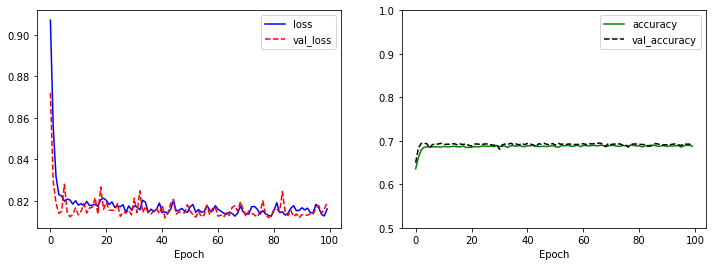

In [456]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 1)
plt.legend()

plt.show()

### DNN은 변수 개수의 단순화가 필요하여 중요변수 선정이 중요할 듯 보임

## 고려사항
- 클래스 불균형 해결 : 오버샘플링 / 클래스 가중치 조정
- 변수 선택  : ols 회귀로 변수 유의성 확인 및 상관관계분석/ 의사결정나무 기반 알고리즘으로 변수 중요도 추출
- 피처 엔지니어링 : 변수의 범주화, 파생변수 고려
- 교차검증

## 실험 : 변수 유의수준 확인 후 변수 선정

In [359]:
import statsmodels.api as sm

In [434]:
col = list(df.columns)

In [435]:
col.remove('credit')

In [436]:
a = sm.OLS(df['credit'], df[col]).fit()
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 credit   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     13.64
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          3.61e-110
Time:                        17:35:37   Log-Likelihood:                -27853.
No. Observations:               26457   AIC:                         5.581e+04
Df Residuals:                   26406   BIC:                         5.622e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
gender                            0.0068      0.011      0.596      0.551      -0.016       0.029
car                               0.0056      0.010      0.573      0.566      -0.014       0.025
reality                          -0.0190      0.010     -1.977      0.048      -0.038      -0.000
child_num                         0.0241      0.030      0.805      0.421      -0.035       0.083
income_total                   1.423e-07    1.1e-07      1.296      0.195   -7.29e-08    3.57e-07
DAYS_BIRTH                        0.0018      0.001      3.124      0.002       0.001       0.003
DAYS_EMPLOYED                    -0.0009      0.002     -0.536      0.592      -0.004       0.002
work_phone                       -0.0090      0.011     -0.787      0.432      -0.032       0.013
phone                             0.0014      0.010      0.142      0.887      -0.018       0.021
email                             0.0464      0.015      3.071      0.002       0.017       0.076
family_size                       0.0327      0.028      1.147      0.251      -0.023       0.088
begin_month                       0.0061      0.000     23.555      0.000       0.006       0.007
Commercial associate              0.4068      0.082      4.953      0.000       0.246       0.568
Pensioner                         0.3715      0.083      4.465      0.000       0.208       0.535
State servant                     0.3936      0.083      4.769      0.000       0.232       0.555
Student                           0.4241      0.234      1.810      0.070      -0.035       0.883
Working                           0.3878      0.082      4.741      0.000       0.227       0.548
Academic degree                   0.3856      0.144      2.677      0.007       0.103       0.668
Higher education                  0.3674      0.075      4.867      0.000       0.219       0.515
Incomplete higher                 0.4191      0.077      5.416      0.000       0.267       0.571
Lower secondary                   0.4161      0.083      5.033      0.000       0.254       0.578
Secondary / secondary special     0.3956      0.075      5.272      0.000       0.248       0.543
Civil marriage                    0.3903      0.086      4.562      0.000       0.223       0.558
Married                           0.4340      0.084      5.149      0.000       0.269       0.599
Separated                         0.3960      0.070      5.639      0.000       0.258       0.534
Single / not married              0.3984      0.068      5.816      0.000       0.264       0.533
Widow                             0.3651      0.071      5.149      0.000       0.226       0.504
Co-op apartment                   0.2944      0.084      3.498      0.000       0.129       0.459
House / apartment                 0.3574     

In [437]:
pvalues = pd.DataFrame(a.pvalues).reset_index()

In [438]:
p_col = list(pvalues.loc[pvalues[0]<=0.05,'index'])

In [439]:
p_col

['reality',
 'DAYS_BIRTH',
 'email',
 'begin_month',
 'Commercial associate',
 'Pensioner',
 'State servant',
 'Working',
 'Academic degree',
 'Higher education',
 'Incomplete higher',
 'Lower secondary',
 'Secondary / secondary special',
 'Civil marriage',
 'Married',
 'Separated',
 'Single / not married',
 'Widow',
 'Co-op apartment',
 'House / apartment',
 'Municipal apartment',
 'Office apartment',
 'Rented apartment',
 'With parents',
 'Accountants',
 'Cleaning staff',
 'Cooking staff',
 'Core staff',
 'Drivers',
 'HR staff',
 'High skill tech staff',
 'Laborers',
 'Managers',
 'Medicine staff',
 'NAN',
 'Sales staff',
 'Security staff']

In [442]:
X_train_p = X_train[p_col]

In [443]:
X_train_p

,reality,DAYS_BIRTH,email,begin_month,Commercial associate,Pensioner,State servant,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,Laborers,Managers,Medicine staff,NAN,Sales staff,Security staff
0,1,26.156164,0,18.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,33.895890,0,36.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,34.723288,0,6.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,46.043836,0,6.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,39.589041,0,2.0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21160,1,40.657534,0,26.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21161,1,38.890411,0,13.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
21162,1,36.750685,0,46.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21163,1,49.920548,1,43.0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [457]:
df.corrwith(train.credit).sort_values(ascending=False)

Civil marriage                  -0.018826
Rented apartment                -0.017425
Higher education                -0.015516
Laborers                        -0.012343
Single / not married            -0.010232
reality                         -0.009387
Accountants                     -0.008792
IT staff                        -0.008623
Waiters/barmen staff            -0.008215
Core staff                      -0.008029
Working                         -0.007474
Widow                           -0.005675
Private service staff           -0.004656
High skill tech staff           -0.004526
Co-op apartment                 -0.004309
work_phone                      -0.003134
Low-skill Laborers              -0.003102
Office apartment                -0.003006
Sales staff                     -0.002953
With parents                    -0.002805
Pensioner                       -0.002665
Cooking staff                   -0.002660
Secretaries                     -0.002135
Academic degree                  0